In [1]:
import ssl
import websocket
import json

import pandas as pd
import matplotlib.pyplot as plt
import sqlalchemy

In [2]:
def create_df(msg):
    msg = json.loads(msg)
    if len(msg['events']) > 0:
        df = pd.DataFrame(msg['events'])
        df['timestampms'] = msg['timestampms']
        df = df[['timestampms', 'price', 'amount', 'makerSide']]
        #df['timestampms'] = df['timestampms'].astype('int') #pd.to_datetime(df['timestampms'], unit='ms')
        df['price'] = df['price'].astype('float')
        df['amount'] = df['amount'].astype('float')
        df['makerSide'] = df['makerSide'].astype('str')
        return df

def on_message(ws, message):
    df = create_df(message)
    if df is not None:
        df.to_sql(sym+'_traded', engine, if_exists='append', index=False, index_label=['timestampms', 'price', 'amount', 'makerSide'])

In [3]:
sym = 'BTCUSD'
engine = sqlalchemy.create_engine('sqlite:///'+sym+'stream.db')

In [5]:
ws = websocket.WebSocketApp(
    "wss://api.gemini.com/v1/marketdata/btcusd?trades=true",
    on_message=on_message)
ws.run_forever(sslopt={"cert_reqs": ssl.CERT_NONE})

True

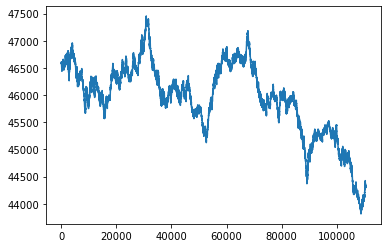

,timestampms,price,amount,makerSide
0,1648877113189,46582.75,0.000398,bid
1,1648877113189,46582.75,0.001602,bid
2,1648877135102,46585.42,0.000300,ask
3,1648877138171,46585.42,0.472565,ask
4,1648877138171,46585.42,0.136501,ask
...,...,...,...,...
110491,1649255844726,44300.00,0.050000,ask
110492,1649255844794,44300.00,0.030000,ask
110493,1649255844900,44300.00,0.090000,ask
110494,1649255844906,44300.00,0.018701,ask


In [11]:
df = pd.read_sql(sym+'_traded', engine)

df['price'].plot()
plt.show()

#colors = ['b' if x=='bid' else 'r' for x in df['makerSide'].to_list()]
#plt.bar(df['price'], df['amount'], color = colors)
#plt.show()

df

In [22]:
#engine.execute('delete from '+ sym + '_traded')